In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import os

## Prepare data

In [15]:
data = pd.read_csv(os.path.join(os.getcwd(), 'Real_estate_valuation_data_set.csv'))

In [16]:
data.describe()

,transaction_date,house_age,nearest_MRT_station_distance,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [17]:
data.drop('transaction_date', axis=1, inplace=True)
X = data.drop('house_price_of_unit_area', axis=1)
y = data['house_price_of_unit_area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(248, 5) (83, 5) (83, 5)
(248,) (83,) (83,)


In [18]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = y_scaler.transform(y_val.values.reshape(-1, 1))

/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/SimonMcDonnell/miniconda3/envs/diss/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [19]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()

In [20]:
def plot_predictions(pred, y, save_as=None):
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(111)
    ax.scatter(pred, y, alpha=0.2)
    ax.set_xlabel('predicted')
    ax.set_ylabel('true')
    ax.plot(np.arange(0, 90, 0.1), np.arange(0, 90, 0.1))
    if save_as != None:
        plt.savefig(save_as)

In [21]:
def msse(pred, y):
    return (np.sum((y - pred)**2)) / y.shape[0]

## Models

In [47]:
model = keras.Sequential([
    keras.layers.Dense(5, input_shape=(5,), kernel_regularizer=keras.regularizers.l2(0.01)),
#     keras.layers.BatchNormalization(gamma_regularizer=keras.regularizers.l2(0.01),
#                                    beta_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Activation('relu'),
    keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(0.01))
])
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])

In [48]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [49]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=[X_val, y_val], callbacks=[early_stop])

Train on 248 samples, validate on 83 samples
Epoch 1/1000
248/248 [==============================] - 0s 2ms/step - loss: 1.8482 - mean_absolute_error: 1.0251 - val_loss: 1.3013 - val_mean_absolute_error: 0.8324
Epoch 2/1000
248/248 [==============================] - 0s 58us/step - loss: 1.7763 - mean_absolute_error: 1.0051 - val_loss: 1.2447 - val_mean_absolute_error: 0.8164
Epoch 3/1000
248/248 [==============================] - 0s 81us/step - loss: 1.7061 - mean_absolute_error: 0.9855 - val_loss: 1.1941 - val_mean_absolute_error: 0.8003
Epoch 4/1000
248/248 [==============================] - 0s 88us/step - loss: 1.6415 - mean_absolute_error: 0.9675 - val_loss: 1.1456 - val_mean_absolute_error: 0.7843
Epoch 5/1000
248/248 [==============================] - 0s 75us/step - loss: 1.5822 - mean_absolute_error: 0.9502 - val_loss: 1.0990 - val_mean_absolute_error: 0.7675
Epoch 6/1000
248/248 [==============================] - 0s 81us/step - loss: 1.5222 - mean_absolute_error: 0.9328 - val_l

Epoch 98/1000
248/248 [==============================] - 0s 106us/step - loss: 0.4709 - mean_absolute_error: 0.4202 - val_loss: 0.4043 - val_mean_absolute_error: 0.4048
Epoch 99/1000
248/248 [==============================] - 0s 81us/step - loss: 0.4700 - mean_absolute_error: 0.4196 - val_loss: 0.4039 - val_mean_absolute_error: 0.4047
Epoch 100/1000
248/248 [==============================] - 0s 96us/step - loss: 0.4697 - mean_absolute_error: 0.4192 - val_loss: 0.4033 - val_mean_absolute_error: 0.4037
Epoch 101/1000
248/248 [==============================] - 0s 87us/step - loss: 0.4689 - mean_absolute_error: 0.4188 - val_loss: 0.4027 - val_mean_absolute_error: 0.4032
Epoch 102/1000
248/248 [==============================] - 0s 102us/step - loss: 0.4685 - mean_absolute_error: 0.4184 - val_loss: 0.4025 - val_mean_absolute_error: 0.4030
Epoch 103/1000
248/248 [==============================] - 0s 96us/step - loss: 0.4681 - mean_absolute_error: 0.4184 - val_loss: 0.4023 - val_mean_absolute_

248/248 [==============================] - 0s 64us/step - loss: 0.4409 - mean_absolute_error: 0.4032 - val_loss: 0.3676 - val_mean_absolute_error: 0.3832
Epoch 195/1000
248/248 [==============================] - 0s 76us/step - loss: 0.4406 - mean_absolute_error: 0.4031 - val_loss: 0.3672 - val_mean_absolute_error: 0.3831
Epoch 196/1000
248/248 [==============================] - 0s 67us/step - loss: 0.4405 - mean_absolute_error: 0.4032 - val_loss: 0.3669 - val_mean_absolute_error: 0.3829
Epoch 197/1000
248/248 [==============================] - 0s 65us/step - loss: 0.4402 - mean_absolute_error: 0.4030 - val_loss: 0.3666 - val_mean_absolute_error: 0.3824
Epoch 198/1000
248/248 [==============================] - 0s 66us/step - loss: 0.4400 - mean_absolute_error: 0.4028 - val_loss: 0.3659 - val_mean_absolute_error: 0.3824
Epoch 199/1000
248/248 [==============================] - 0s 86us/step - loss: 0.4397 - mean_absolute_error: 0.4027 - val_loss: 0.3656 - val_mean_absolute_error: 0.3821
E

248/248 [==============================] - 0s 92us/step - loss: 0.4233 - mean_absolute_error: 0.3949 - val_loss: 0.3422 - val_mean_absolute_error: 0.3703
Epoch 291/1000
248/248 [==============================] - 0s 100us/step - loss: 0.4233 - mean_absolute_error: 0.3950 - val_loss: 0.3425 - val_mean_absolute_error: 0.3714
Epoch 292/1000
248/248 [==============================] - 0s 81us/step - loss: 0.4233 - mean_absolute_error: 0.3949 - val_loss: 0.3418 - val_mean_absolute_error: 0.3702
Epoch 293/1000
248/248 [==============================] - 0s 91us/step - loss: 0.4229 - mean_absolute_error: 0.3948 - val_loss: 0.3414 - val_mean_absolute_error: 0.3700
Epoch 294/1000
248/248 [==============================] - 0s 78us/step - loss: 0.4229 - mean_absolute_error: 0.3947 - val_loss: 0.3415 - val_mean_absolute_error: 0.3702
Epoch 295/1000
248/248 [==============================] - 0s 88us/step - loss: 0.4227 - mean_absolute_error: 0.3946 - val_loss: 0.3409 - val_mean_absolute_error: 0.3695


248/248 [==============================] - 0s 100us/step - loss: 0.4145 - mean_absolute_error: 0.3915 - val_loss: 0.3258 - val_mean_absolute_error: 0.3606
Epoch 387/1000
248/248 [==============================] - 0s 62us/step - loss: 0.4143 - mean_absolute_error: 0.3915 - val_loss: 0.3256 - val_mean_absolute_error: 0.3602
Epoch 388/1000
248/248 [==============================] - 0s 65us/step - loss: 0.4144 - mean_absolute_error: 0.3916 - val_loss: 0.3255 - val_mean_absolute_error: 0.3603
Epoch 389/1000
248/248 [==============================] - 0s 72us/step - loss: 0.4148 - mean_absolute_error: 0.3917 - val_loss: 0.3266 - val_mean_absolute_error: 0.3624
Epoch 390/1000
248/248 [==============================] - 0s 60us/step - loss: 0.4142 - mean_absolute_error: 0.3918 - val_loss: 0.3269 - val_mean_absolute_error: 0.3629
Epoch 391/1000
248/248 [==============================] - 0s 74us/step - loss: 0.4140 - mean_absolute_error: 0.3917 - val_loss: 0.3266 - val_mean_absolute_error: 0.3627


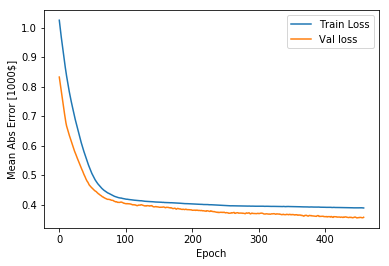

In [50]:
plot_history(history)

In [51]:
pred = y_scaler.inverse_transform(model.predict(X_test).flatten())
msse(pred, y_test)

37.48920243965045

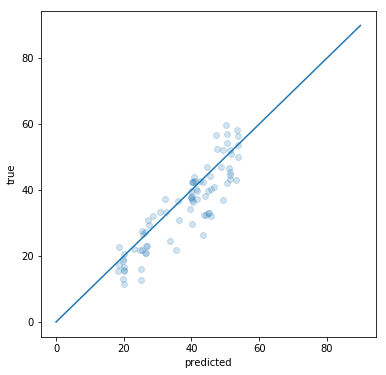

In [52]:
plot_predictions(pred, y_test)

In [71]:
weights = model.get_weights()
np.save('relu_weights', weights, allow_pickle=True)